In [53]:
from google.cloud import vision
from google.cloud import storage
from PIL import Image
import numpy as np
import os, sys
from helper import *
import csv  
from io import BytesIO
from IPython import display

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = r"../guppies-test-4c48569421d8.json"

### Read all files from the google bucket. Can cycle through the files in this list and write results to the csv file.

In [54]:
# Read all JPG files. All images are in both .jpg and .nef formats, need to avoid duplicates.
all_files = ListAvaliableFiles("guppy_images")
all_jpg_files = [ x for x in all_files if "JPG" in x ]

# Read the random number array we will use to assign images.
# random_array = np.arange(len(all_jpg_files))
# np.random.shuffle(random_array)
# np.save('../Data/radom_array.npy', random_array)
random_array = np.load('../Data/radom_array.npy')

# Assign images.
Jordan_array = random_array[0:500]
Sunny_array = random_array[500:1000]

Jordan_files = []
Sunny_files = []

for index in Jordan_array:
    Jordan_files.append(all_jpg_files[index])

for index in Sunny_array:
    Sunny_files.append(all_jpg_files[index])

### Opens a file from the google bucket (or locally, depends if using RetreiveImage (cloud) or LoadImage (local)), crops it, reads it and corrects the output.

In [55]:
file = Jordan_files[25]
file= '1301/Upper Lalaja/4B/100NCD60/DSC_2056.JPG'
image = RetreiveImage(file, verbose=True)

# file = '/Users/jordan/Desktop/Guppies/Data/raw/DSC_1053.JPG'
# image = LoadImage(file)

cropped_image = CroppedImage(image, verbose=True)
output_string, word_confidences = ReadImage(cropped_image, verbose=True)
label = FindErrors(output_string, verbose=True)
print("Initial label:", output_string,
      "\nCorrected label:", label)


Image has been read from google bucket.

Image has been cropped.

Output: MUL-4150-002/04/13 
Confidence: 0.6017570783180516

Removing special characters from the output string (e.g. '.', '|').
characters ( have been replaced with 1
characters \ have been replaced with 1
characters ( have been replaced with 1
characters \ have been replaced with 1
Character M is fine.
Character U is fine.
Character L is fine.
Character - is fine.
Character 4 is fine.
Character 1 is fine.
Character 5 is fine.
Character 0 is fine.
Character - is fine.
Character 0 is fine.
Character 0 is fine.
Character 2 is fine.
Character / is fine.
Character 0 is fine.
Character 4 is fine.
Character / is fine.
Character 1 is fine.
Character 3 is fine.
String after preprocessing: ['MUL', '4150', '002/04/13']

Correct number of paragraphs.

Looking for errors in the title (MUL).
Final title: MUL

Looking for errors in the identity (4150).
Replacing erroneous number (1) with a matched alternative.
Character 1 at index 1 

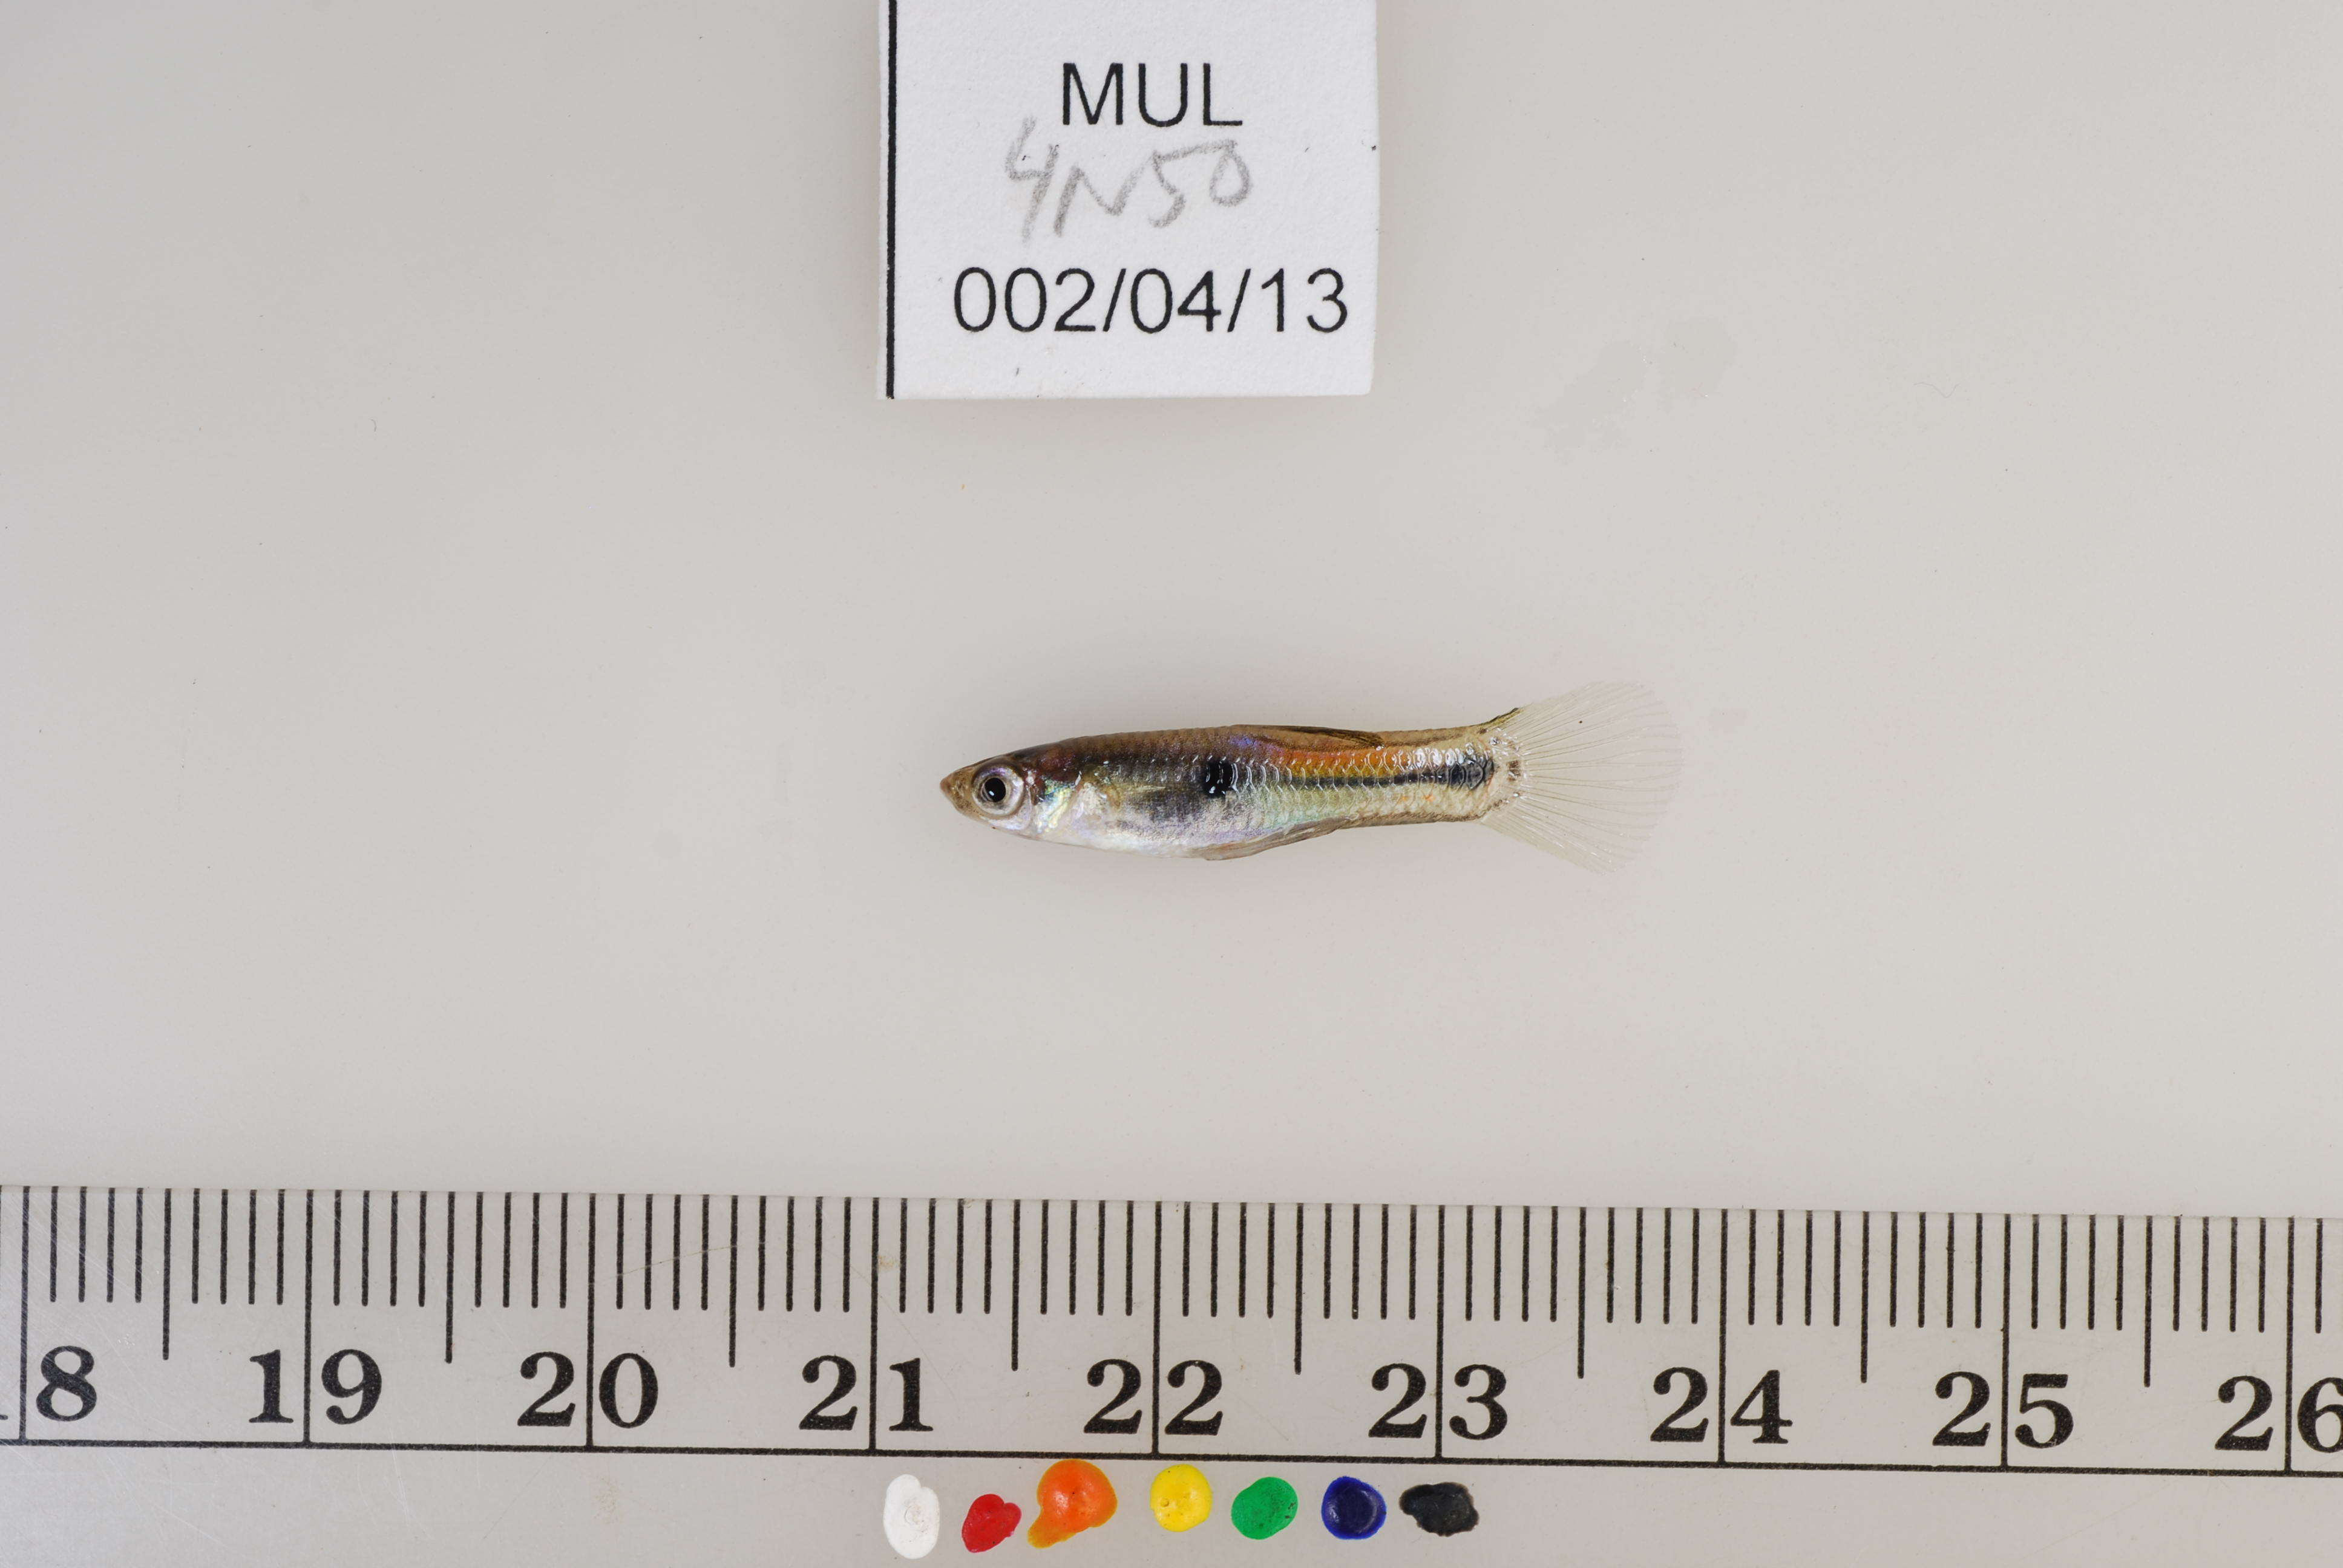

In [56]:
Image.open(image)

### Write filename, initial prediction, corrected prediction and the manually inputted truth to the truth.csv file for a set of file names.
The files have been randomised and split.

In [ ]:
with open('../Data/truth.csv', 'a') as f:
    writer = csv.writer(f)

    for file in Sunny_files:
        # Read the data and predict the label.
        image = RetreiveImage(file, verbose=False)
        cropped_image = CroppedImage(image, verbose=False)

        display.display(Image.open(cropped_image))
        display.clear_output(wait=True)

        initial_prediction = ReadImage(cropped_image, verbose=False)[0]
        corrected_prediction = FindErrors(initial_prediction)
    
        # Provide truth
        truth = input("Truth:")

        writer.writerow([file, initial_prediction, corrected_prediction, truth])

### Read through all cloud files and write filename, initial prediction and corrected prediction to the predictions.csv file.

In [ ]:
files = all_jpg_files
with open('../Data/predictions.csv', 'w') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(['filename', 'prediction', 'corrected'])

    for i, file in enumerate(files):    
        print(f'{i+1}/{len(files)}',end='\r')

        # Read the data
        image = RetreiveImage(file, verbose=False)
        cropped_image = CroppedImage(image, verbose=False)
        Image.open(cropped_image)
        initial_prediction = ReadImage(cropped_image, verbose=False)[0]
        corrected_prediction = FindErrors(initial_prediction)
        
        # write the data
        writer.writerow([all_files[i], initial_prediction, corrected_prediction])

### Some code to reanalyse predictions once we have changed the algorithm

In [57]:
import csv

pred_file = 'Truth'

with open(f'../Data/{pred_file}_new.csv', 'w') as f_new:
    with open(f'../Data/{pred_file}.csv', 'r') as f:
        filereader = csv.reader(f)
        writer = csv.writer(f_new)
        for n, row in enumerate(filereader):
            if row != []:
                new_row = row[:2]

                new_prediction = FindErrors(row[1])

                new_row.append(new_prediction)
                new_row.append(row[3])

                writer.writerow(new_row)


now delete old file and rename new one.

### Some code to check the accuracy of the algorithm

In [58]:
import csv

correct_list = []
with open(f'../Data/{pred_file}_new.csv', 'r') as f:
    filereader = csv.reader(f)
    for n, row in enumerate(filereader):
        if row != []:
            correct = int(row[3] == row[2])
            correct_list.append(correct)

            if not correct:
                

                true = row[3].split('-')
                pred = row[2].split('-')

                # if pred == ['1']:
                #     print(n, 'no pred')
                #     pass

                if len(true) != 3 or len(pred) != 3:
                    print(n, 'error')
                    continue

                for i in range(3):
                    if true[i] != pred[i]:
                        print(n, true[i], pred[i])



1 3F4F 3S4S
5 3P6W 3PLAW
6 3Y6G 3Y6G5
13 1O4K 1O4I
15 4O7Y 9O7Y
18 error
20 2G5G 2G5G2
23 1K7K 1I7K
29 1Y5O 1S0
32 3S4W 3S4
33 2W7V QW7V
36 1N8F 1N5F
43 1O5P 1O5G
46 FLL FLLA
49 2B8W XZ3BW
50 FUL FULA
50 7W8G 7I8G
57 4W5W 4W5WN
62 4N5O 4I5O
63 5P7K 4SPYK
65 2K8B 2K8B218
73 2O7B 2O3O1
73 01/27/13 1
76 4O7B 4O7F
85 5S7B 5B7P
95 6Y7P 6Y2P
96 6V7P 6V2P
97 1Y8R 1Y8P
98 1Y7G 1Y6
99 5K6O 5Y6O
100 2R6Y 2ROY
101 1F5F JF5G
103 1V2G7G 1S6Y6
104 5P7V 5F7V
109 3R7V 3R2V
110 3W7V NFMF
113 1F3O 1G3O
115 2B5G 2R5G
117 5R6W 5R8W
118 2R5R 2R1R
124 1W3P 1BP
139 1R8G 1R5C
141 2N4F 2N7F
149 7V8G 7O8G
153 4V8G 4I8G
155 3W6R 3G6
158 1G6S 1Y6S
159 2F8O 2G8O
165 1K7Y 1I2Y4
166 5F8V 
169 4V6O 4I6O
183 3O4R 3O4F
185 4O7K 4O7I
185 01/28/13 1
186 1R8Y XIRB7
187 FLL 1
187 5B6B7R 
193 3K4G8K 3K4Y8K
194 1Y4K LY4K
200 4K8K 4K5K
204 1Y4N JY4N
206 2W4S 2W7W
208 3B7R 3F7R
209 1O2O7P 1O2O70
211 2O3O7W 0B0YW
212 3R8Y 3S8I
214 4V8K 4I8I
220 1/28/13 01/28/13
221 1V8Y 1V3Y
223 FLL 1
223 3Y8B 
226 1B4K 1F4K
228 1K4W WX4W
229 e

In [59]:
np.mean(correct_list), len(correct_list)

(0.694, 1000)

### Code returns the file name of all images we are currently not predicting accurately.

In [5]:
def ErrorFiles(TruthPath):
    Error_Files = []
    indices = []

    with open(TruthPath, 'r') as f:
        filereader = csv.reader(f)
        for n, row in enumerate(filereader):
            if row[2] != row[3]:
                file = row[0]
                Error_Files.append(file)
                indices.append(n)

    return Error_Files, indices

### Cycles through all error images, proceeds to the next image from any input.

In [6]:
truth_path = '../Data/Truth_new.csv'
files, indices = ErrorFiles(truth_path)

for index in range(len(files)):
      file = files[index]
      file_index = indices[index]
      image = RetreiveImage(file, verbose=False)

      cropped_image = CroppedImage(image, verbose=False)
      output_string, word_confidences = ReadImage(cropped_image, verbose=False)
      label = FindErrors(output_string, verbose=False)

      with open(truth_path, 'r') as f:
            filereader = csv.reader(f)
            for n, row in enumerate(filereader):
                  if n == file_index:
                        truth_label = row[3]

      print("Initial label:", output_string,
            "\nCorrected label:", label)

      print("Truth label:", truth_label,
            "Row in file:", file_index + 1)

      display.display(Image.open(cropped_image))
      display.clear_output(wait=True)

      input()

KeyboardInterrupt: Interrupted by user

### Reads image from error file array in full verbose mode.

In [61]:
files, indices = ErrorFiles('../Data/Truth_new.csv')
index = 100
file = files[index]
file_index = indices[index]
image = RetreiveImage(file, verbose=True)

cropped_image = CroppedImage(image, verbose=True)
output_string, word_confidences = ReadImage(cropped_image, verbose=True)
label = FindErrors(output_string, verbose=True)
print("Initial label:", output_string,
      "\nCorrected label:", label)

print("Row in file:", file_index - 1)


Image has been read from google bucket.

Image has been cropped.

Output: O-MLL-6180-01/28/13 
Confidence: 0.3583532282777788

Removing special characters from the output string (e.g. '.', '|').
characters ( have been replaced with 1
characters \ have been replaced with 1
characters ( have been replaced with 1
characters \ have been replaced with 1
characters ( have been replaced with 1
characters \ have been replaced with 1
Character O is fine.
Character - is fine.
Character M is fine.
Character L is fine.
Character L is fine.
Character - is fine.
Character 6 is fine.
Character 1 is fine.
Character 8 is fine.
Character 0 is fine.
Character - is fine.
Character 0 is fine.
Character 1 is fine.
Character / is fine.
Character 2 is fine.
Character 8 is fine.
Character / is fine.
Character 1 is fine.
Character 3 is fine.
String after preprocessing: ['MLL', '6180', '01/28/13']

Correct number of paragraphs.

Looking for errors in the title (MLL).
Final title: MLL

Looking for errors in the 

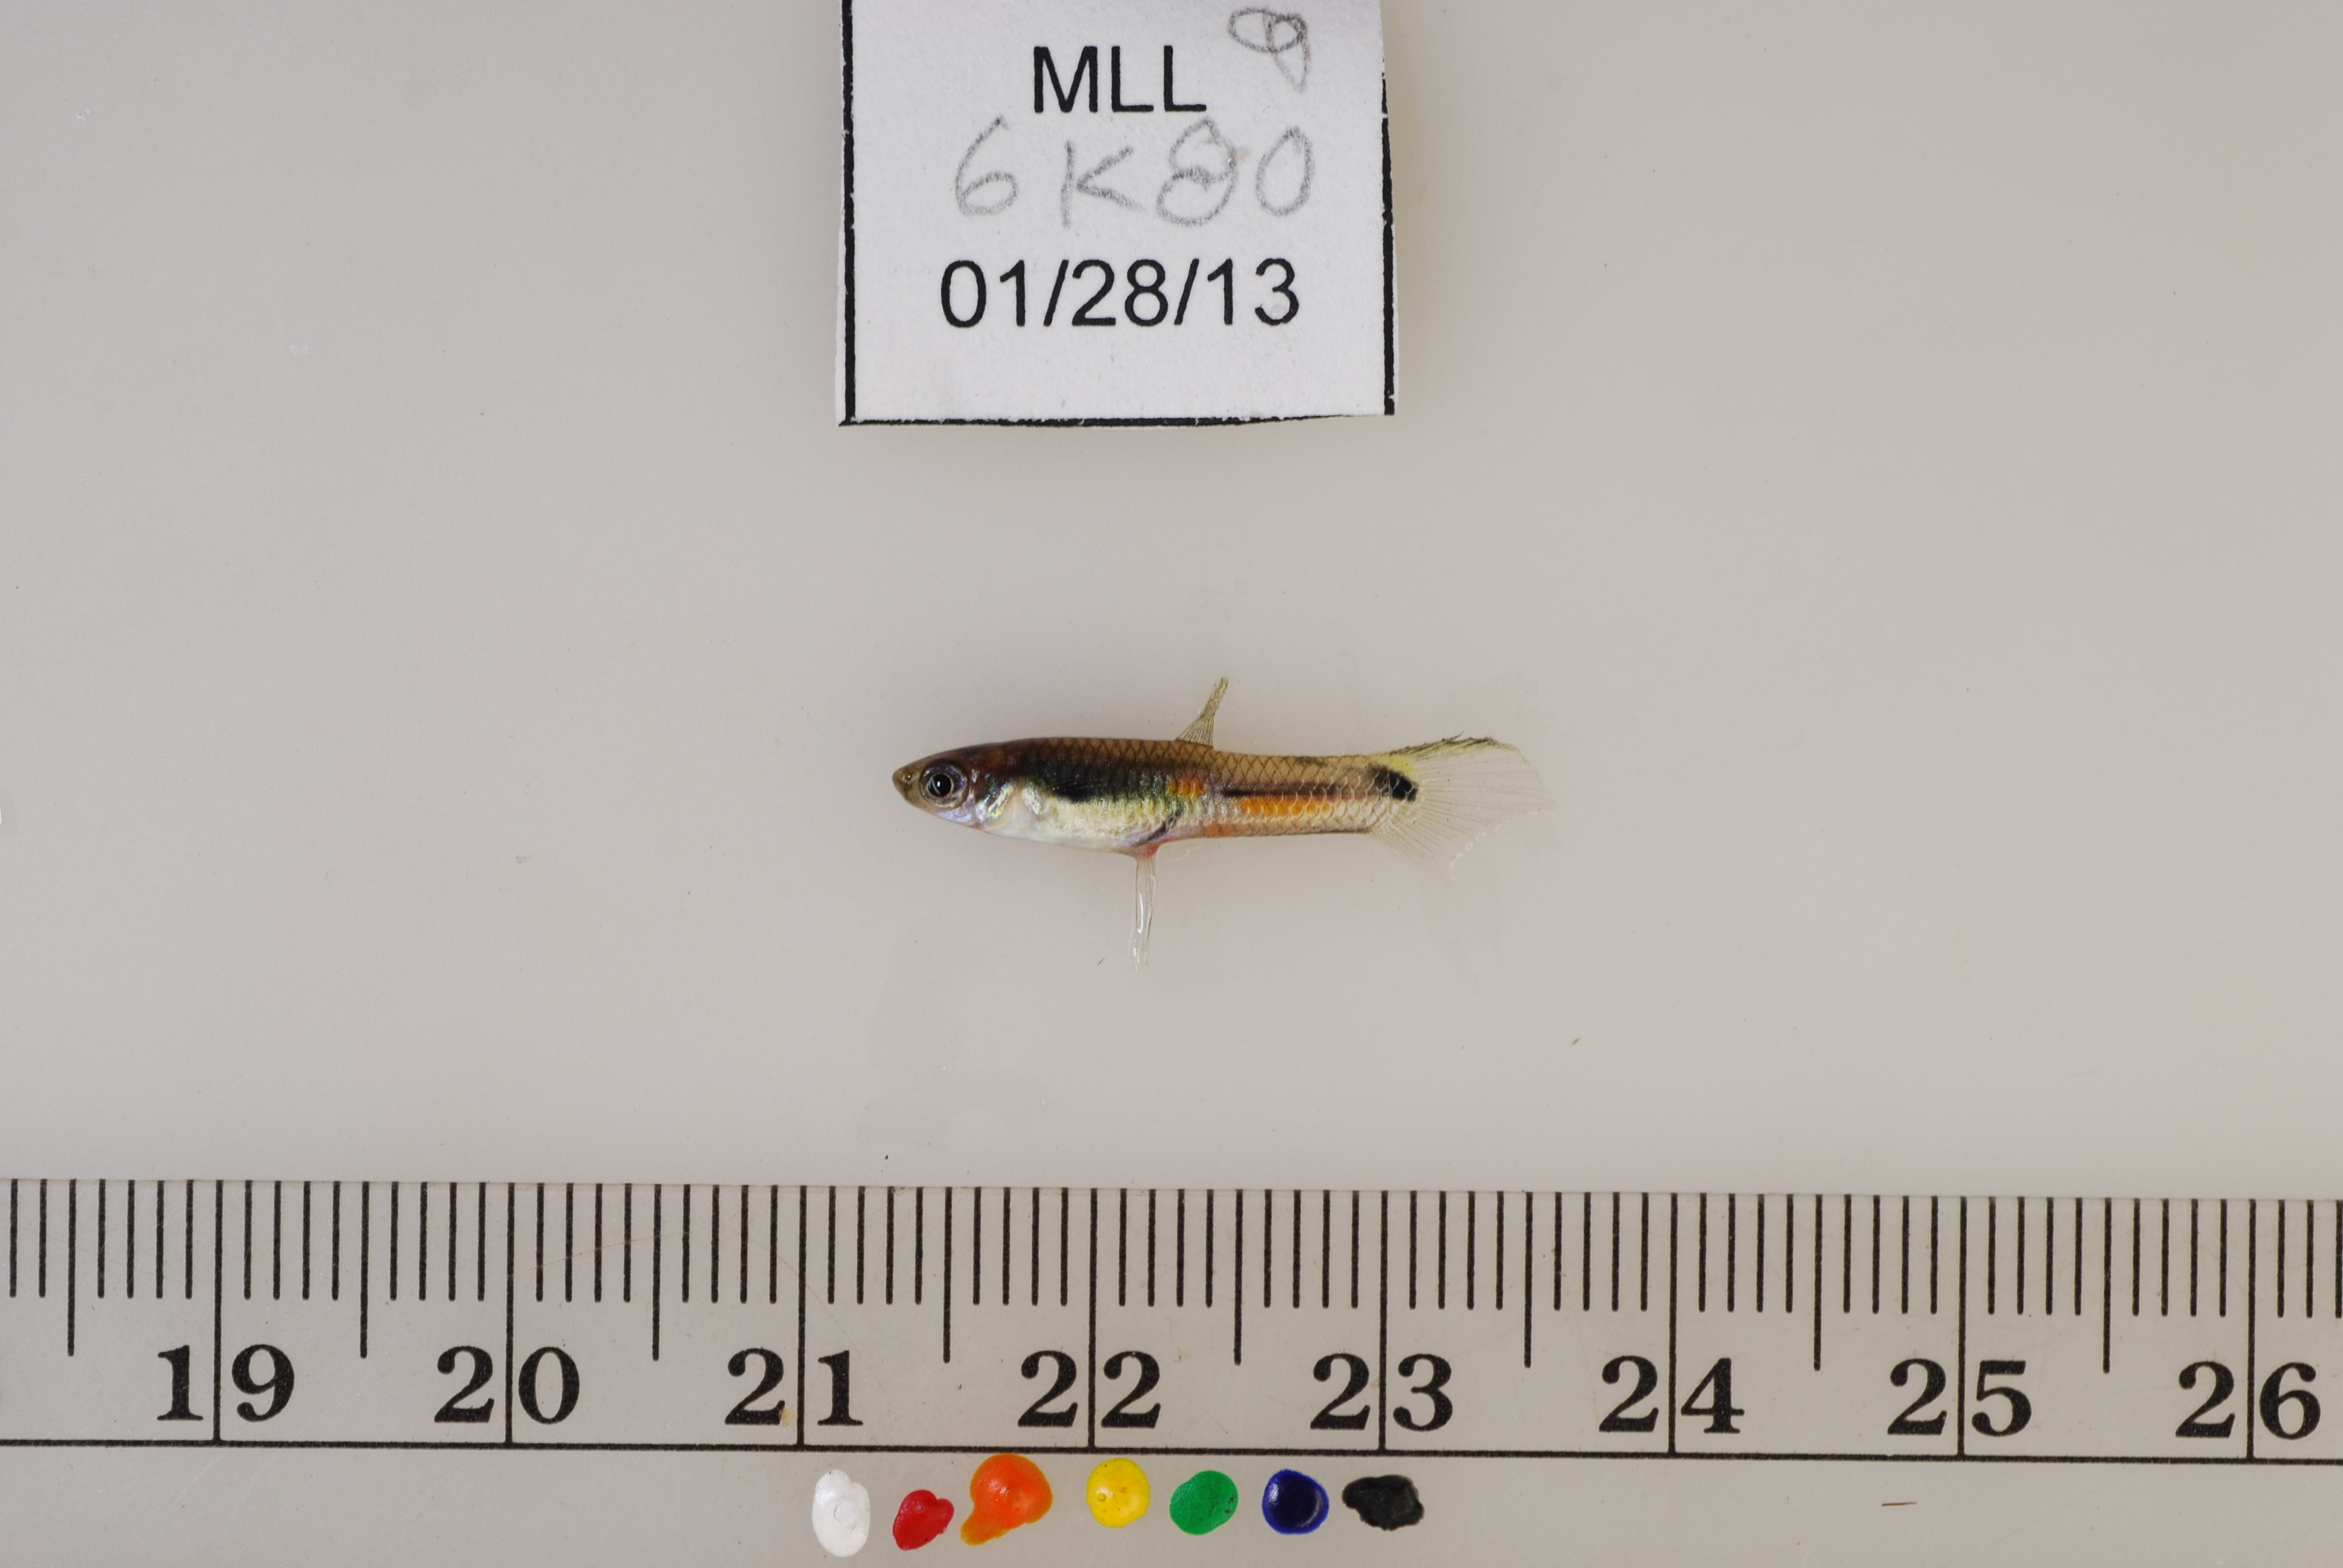

In [62]:
Image.open(image)

### Code used to combine truth_sunny and truth_Jordan files.

In [ ]:
# files = ['../Data/truth_Jordan.csv', '../Data/truth_sunny.csv']

# whole_file = []

# for file in files:
#     with open(file, 'r') as f:
#         filereader = csv.reader(f)
#         for row in filereader:
#             if row != []:
#                 whole_file.append(row)


# with open('../Data/Truth.csv', 'w') as Truth:
#     writer = csv.writer(Truth)
#     for row in whole_file:
#         writer.writerow(row)

In [45]:
files = ErrorFiles(truth_path)[0]

for i, file in enumerate(files):
    # Initialise a client
    storage_client = storage.Client()
    # Create a bucket object for our bucket
    bucket = storage_client.get_bucket("guppy_images")
    # Create a blob object from the filepath
    blob = bucket.blob(file)
    # Download the file to a destination
    blob.download_to_filename('../Data/ErrorImages/%s' %(file.replace("/", "-")))
    print("%i/%i" %(i+1, len(files)))

1/307
2/307
3/307
4/307
5/307
6/307
7/307
8/307
9/307
10/307
11/307
12/307
13/307
14/307
15/307
16/307
17/307
18/307
19/307
20/307
21/307
22/307
23/307
24/307
25/307
26/307
27/307
28/307
29/307
30/307
31/307
32/307
33/307
34/307
35/307
36/307
37/307
38/307
39/307
40/307
41/307
42/307
43/307
44/307
45/307
46/307
47/307
48/307
49/307
50/307
51/307
52/307
53/307
54/307
55/307
56/307
57/307
58/307
59/307
60/307
61/307
62/307
63/307
64/307
65/307
66/307
67/307
68/307
69/307
70/307
71/307
72/307
73/307
74/307
75/307
76/307
77/307
78/307
79/307
80/307
81/307
82/307
83/307
84/307
85/307
86/307
87/307
88/307
89/307
90/307
91/307
92/307
93/307
94/307
95/307
96/307
97/307
98/307
99/307
100/307
101/307
102/307
103/307
104/307
105/307
106/307
107/307
108/307
109/307
110/307
111/307
112/307
113/307
114/307
115/307
116/307
117/307
118/307
119/307
120/307
121/307
122/307
123/307
124/307
125/307
126/307
127/307
128/307
129/307
130/307
131/307
132/307
133/307
134/307
135/307
136/307
137/307
138/307
139/